In [75]:
import sys
sys.path.append("../")
import data_challenge_library as dcl 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [76]:
savedir = "image_metrics"
if not os.path.isdir(savedir):
    os.mkdir(savedir)

In [77]:
object_table = dcl.load_table(features = 'Savic', have_images = True,remove_missing_features=True)

Original Table has 446487 sources
Keeping 432767 labeled sources
Keeping only the required 62 features
Keeping 142963 with all features available
Keeping 142963 with available cutouts
class
Star    56532
Gal     53331
Qso     32780
Agn       320
Name: count, dtype: int64


In [78]:
agn = object_table[object_table["class"]=="Qso"].index
gal = object_table[object_table["class"]=="Gal"].index
star = object_table[object_table["class"]=="Star"].index
agn_images = dcl.load_images(agn, normalize = False)
gal_images = dcl.load_images(gal, normalize = False)
star_images = dcl.load_images(star, normalize = False)

In [79]:
from skimage.measure import label
from skimage import data
from skimage import color
from skimage.morphology import extrema
from skimage import exposure
from skimage import metrics

In [80]:
agn_images = [color.rgb2gray(i) for i in agn_images]
gal_images = [color.rgb2gray(i) for i in gal_images]
star_images = [color.rgb2gray(i) for i in star_images]

In [81]:
std_agn = [np.nanstd((i-np.nanmin(i))/np.nanmax(i)) for i in agn_images]
std_gal = [np.nanstd((i-np.nanmin(i))/np.nanmax(i)) for i in gal_images]
std_star = [np.nanstd((i-np.nanmin(i))/np.nanmax(i)) for i in star_images]

KeyboardInterrupt: 

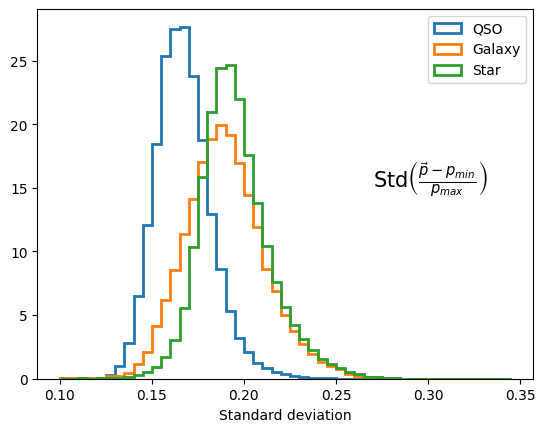

In [ ]:

bins = np.arange(0.1, 0.35, 0.005)
fig, ax = plt.subplots()
ax.hist(std_agn, bins = bins, density = True, histtype="step", lw =2, label = "QSO")
ax.hist(std_gal, bins = bins, density = True, histtype="step", lw =2, label = "Galaxy")
ax.hist(std_star, bins = bins, density = True, histtype="step", lw =2, label = "Star")
ax.text(0.27, 15, r"Std$\left(\frac{\vec{p}-p_{min}}{p_{max}}\right)$", fontsize = 15)
ax.legend()
ax.set_xlabel("Standard deviation")
plt.savefig(os.path.join(savedir, "standard_deviation.png"), bbox_inches = "tight")

In [ ]:
ratio = 0.2
comp_agn = [np.sum(i >= ratio*np.nanmax(i))/256 for i in agn_images]
comp_gal = [np.sum(i >= ratio*np.nanmax(i))/256 for i in gal_images]
comp_star = [np.sum(i >= ratio*np.nanmax(i))/256 for i in star_images]

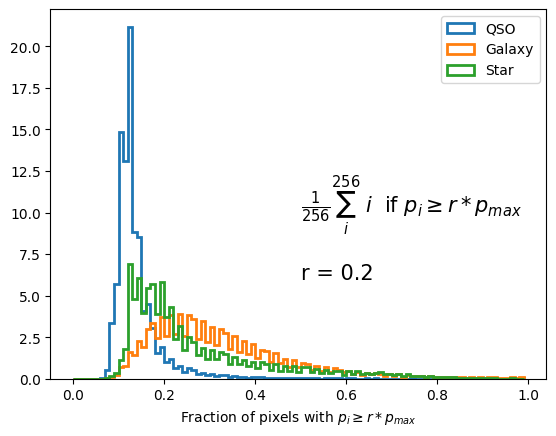

In [ ]:
bins = np.arange(0.0, 1, 0.01)
fig, ax = plt.subplots()
ax.hist(comp_agn, bins = bins, density = True, histtype="step", lw =2, label = "QSO")
ax.hist(comp_gal, bins = bins, density = True, histtype="step", lw =2, label = "Galaxy")
ax.hist(comp_star, bins = bins, density = True, histtype="step", lw =2, label = "Star")
ax.legend()
ax.text(0.5, 10, r"$\frac{1}{256}\sum_{i}^{256}\;i$  if $p_{i} \geq r*p_{max}$", fontsize = 15)
ax.text(0.5, 6, "r = 0.2", fontsize = 15)
ax.set_xlabel(r"Fraction of pixels with $p_{i} \geq r*p_{max}$ ")
plt.savefig(os.path.join(savedir, "compactness_distribution.png"), bbox_inches = "tight")

In [ ]:
from scipy.stats import ks_2samp

In [ ]:
ratios = [0.0005, 0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.13, 0.15, 0.18, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.55, 0.6]
star_agn = []
gal_agn = []
star_gal = []
for ratio in ratios:
    comp_agn = [np.sum(i >= ratio*np.nanmax(i))/256 for i in agn_images]
    comp_gal = [np.sum(i >= ratio*np.nanmax(i))/256 for i in gal_images]
    comp_star = [np.sum(i >= ratio*np.nanmax(i))/256 for i in star_images]
    star_agn.append(ks_2samp(comp_agn, comp_star)[0])
    star_gal.append(ks_2samp(comp_gal, comp_star)[0])
    gal_agn.append(ks_2samp(comp_gal, comp_agn)[0])
    

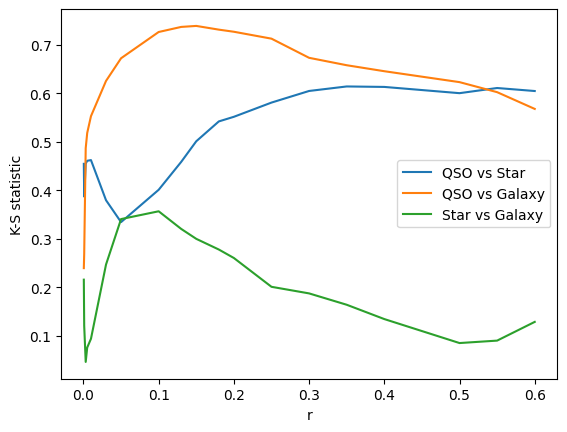

In [ ]:
fig, ax = plt.subplots()
ax.plot(ratios, star_agn, label = "QSO vs Star")
ax.plot(ratios, gal_agn, label = "QSO vs Galaxy")
ax.plot(ratios, star_gal, label = "Star vs Galaxy")
ax.legend()
ax.set_xlabel("r")
ax.set_ylabel("K-S statistic")
plt.savefig(os.path.join(savedir, "compacteness_statistic.png"), bbox_inches = "tight")

Text(0.5, 0, 'Fracrtion of pixels with p> r*max ')

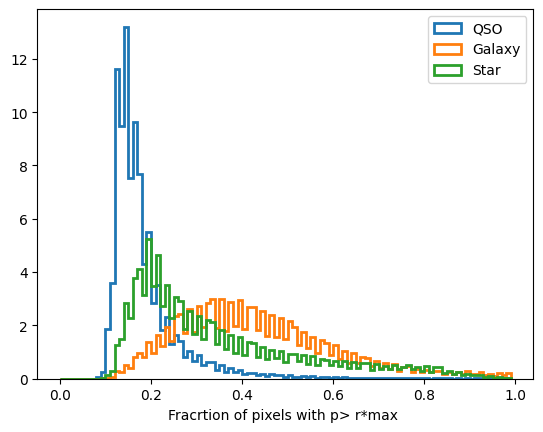

In [ ]:
bins = np.arange(0.0, 1, 0.01)
fig, ax = plt.subplots()
ax.hist(comp_agn, bins = bins, density = True, histtype="step", lw =2, label = "QSO")
ax.hist(comp_gal, bins = bins, density = True, histtype="step", lw =2, label = "Galaxy")
ax.hist(comp_star, bins = bins, density = True, histtype="step", lw =2, label = "Star")
ax.legend()
ax.set_xlabel("Fracrtion of pixels with p> r*max ")

In [ ]:
from skimage.filters import sobel
from skimage.feature import canny

In [ ]:
canny_agn_images = [canny(i) for i in agn_images]
canny_gal_images = [canny(i) for i in gal_images]
canny_star_images = [canny(i) for i in star_images]

In [86]:
agn_edge_len = [np.sum(i > 0)/256 for i in canny_agn_images]
gal_edge_len = [np.sum(i > 0)/256 for i in canny_gal_images]
star_edge_len = [np.sum(i > 0)/256 for i in canny_star_images]


Text(0.5, 0, 'Fraction of pixels belonging to the edge')

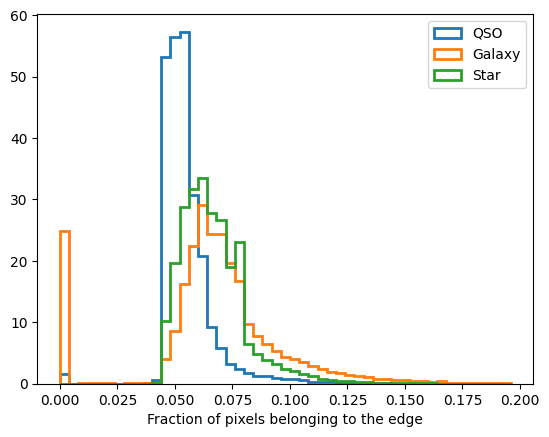

In [96]:
bins = np.arange(0.0, 0.2, 0.004)
fig, ax = plt.subplots()
ax.hist(agn_edge_len, bins = bins, density = True, histtype="step", lw =2, label = "QSO")
ax.hist(gal_edge_len, bins = bins, density = True, histtype="step", lw =2, label = "Galaxy")
ax.hist(star_edge_len, bins = bins, density = True, histtype="step", lw =2, label = "Star")
ax.legend()
ax.set_xlabel("Fraction of pixels belonging to the edge")

In [84]:
for i, lunghezza in enumerate(agn_edge_len):
    if lunghezza == 0:
        print(i)
        break

161


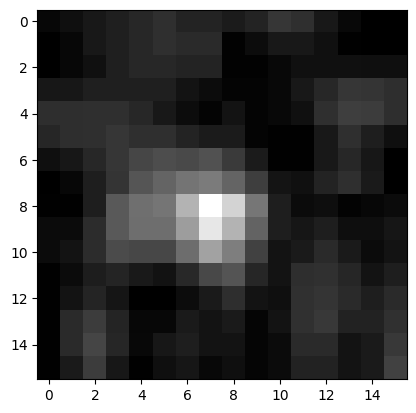

In [85]:
plt.imshow(agn_images[161], cmap=plt.cm.gray)